In [67]:
import numpy 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(10)

In [68]:
dataset = pd.read_csv('D:\\metro\\metroday.csv', header=0, index_col=0)
values = dataset.values

In [69]:
dataset=values[:,0].reshape(-1,1)#注意將一維陣列，轉化為2維陣列
dataset = dataset.astype('float32')
dataset.shape

(2068, 1)

In [70]:
def create_dataset(dataset, look_back=7):#後一個數據和前look_back個數據有關係
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a) #.apeend方法追加元素
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [71]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))#歸一化0-1
dataset = scaler.fit_transform(dataset)
# split into train and test sets  #訓練集和測試集分割
train, test = dataset[:1600,:], dataset[1600:,:]#訓練集和測試集
# use this function to prepare the train and test datasets for modeling
look_back = 7
trainX,trainY = create_dataset(train, look_back)#訓練輸入輸出
testX,testY=create_dataset(test, look_back)#測試輸入輸出

In [72]:
 #reshape input to be [samples, time steps, features]#注意轉化資料維數
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(1592, 1, 7) (1592,) (460, 1, 7) (460,)


In [73]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU

In [74]:
model = Sequential()
model.add(GRU(units = 128, return_sequences = True, input_shape = (1, look_back)))
model.add(GRU(units = 64, return_sequences = True))
model.add(GRU(units = 32, return_sequences = True))
model.add(GRU(units = 16))
model.add(Dense(units=1,activation='relu' ))
model.add(Dense(units=1,activation='sigmoid' ))

In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_25 (GRU)                 (None, 1, 128)            52224     
_________________________________________________________________
gru_26 (GRU)                 (None, 1, 64)             37056     
_________________________________________________________________
gru_27 (GRU)                 (None, 1, 32)             9312      
_________________________________________________________________
gru_28 (GRU)                 (None, 16)                2352      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2         
Total params: 100,963
Trainable params: 100,963
Non-trainable params: 0
________________________________________________

In [76]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [77]:
history = model.fit(trainX, trainY, epochs = 2000, batch_size =20,verbose=1)

Epoch 1/2000
1592/1592 [==============================] - 1s 926us/step - loss: 0.0099
Epoch 2/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0074
Epoch 3/2000
1592/1592 [==============================] - 0s 231us/step - loss: 0.0069
Epoch 4/2000
1592/1592 [==============================] - 0s 219us/step - loss: 0.0063
Epoch 5/2000
1592/1592 [==============================] - 0s 219us/step - loss: 0.0058
Epoch 6/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0055
Epoch 7/2000
1592/1592 [==============================] - 0s 218us/step - loss: 0.0054
Epoch 8/2000
1592/1592 [==============================] - 0s 222us/step - loss: 0.0055
Epoch 9/2000
1592/1592 [==============================] - 0s 228us/step - loss: 0.0053
Epoch 10/2000
1592/1592 [==============================] - 0s 235us/step - loss: 0.0053
Epoch 11/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0055
Epoch 12/2000
1592/1592 [================

1592/1592 [==============================] - 0s 232us/step - loss: 0.0045
Epoch 95/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0043
Epoch 96/2000
1592/1592 [==============================] - 0s 233us/step - loss: 0.0044
Epoch 97/2000
1592/1592 [==============================] - 0s 223us/step - loss: 0.0043
Epoch 98/2000
1592/1592 [==============================] - 0s 218us/step - loss: 0.0043
Epoch 99/2000
1592/1592 [==============================] - 0s 223us/step - loss: 0.0042
Epoch 100/2000
1592/1592 [==============================] - 0s 229us/step - loss: 0.0043
Epoch 101/2000
1592/1592 [==============================] - 0s 218us/step - loss: 0.0043
Epoch 102/2000
1592/1592 [==============================] - 0s 221us/step - loss: 0.0044
Epoch 103/2000
1592/1592 [==============================] - 0s 236us/step - loss: 0.0043
Epoch 104/2000
1592/1592 [==============================] - 0s 224us/step - loss: 0.0043
Epoch 105/2000
1592/1592 [===============

1592/1592 [==============================] - 0s 217us/step - loss: 0.0034
Epoch 187/2000
1592/1592 [==============================] - 0s 216us/step - loss: 0.0034
Epoch 188/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0033
Epoch 189/2000
1592/1592 [==============================] - 0s 230us/step - loss: 0.0033
Epoch 190/2000
1592/1592 [==============================] - 0s 236us/step - loss: 0.0032
Epoch 191/2000
1592/1592 [==============================] - 0s 304us/step - loss: 0.0034
Epoch 192/2000
1592/1592 [==============================] - 0s 297us/step - loss: 0.0034
Epoch 193/2000
1592/1592 [==============================] - 0s 263us/step - loss: 0.0036
Epoch 194/2000
1592/1592 [==============================] - 0s 245us/step - loss: 0.0034
Epoch 195/2000
1592/1592 [==============================] - 0s 248us/step - loss: 0.0033
Epoch 196/2000
1592/1592 [==============================] - 0s 221us/step - loss: 0.0034
Epoch 197/2000
1592/1592 [==========

1592/1592 [==============================] - 0s 223us/step - loss: 0.0026
Epoch 279/2000
1592/1592 [==============================] - 0s 222us/step - loss: 0.0027
Epoch 280/2000
1592/1592 [==============================] - 0s 215us/step - loss: 0.0028
Epoch 281/2000
1592/1592 [==============================] - 0s 220us/step - loss: 0.0026
Epoch 282/2000
1592/1592 [==============================] - 0s 212us/step - loss: 0.0024
Epoch 283/2000
1592/1592 [==============================] - 0s 221us/step - loss: 0.0026
Epoch 284/2000
1592/1592 [==============================] - 0s 219us/step - loss: 0.0025
Epoch 285/2000
1592/1592 [==============================] - 0s 205us/step - loss: 0.0027
Epoch 286/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0029
Epoch 287/2000
1592/1592 [==============================] - 0s 205us/step - loss: 0.0027
Epoch 288/2000
1592/1592 [==============================] - 0s 219us/step - loss: 0.0028
Epoch 289/2000
1592/1592 [==========

1592/1592 [==============================] - 0s 234us/step - loss: 0.0021
Epoch 371/2000
1592/1592 [==============================] - 0s 230us/step - loss: 0.0021
Epoch 372/2000
1592/1592 [==============================] - 0s 229us/step - loss: 0.0021
Epoch 373/2000
1592/1592 [==============================] - 0s 232us/step - loss: 0.0022
Epoch 374/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0023
Epoch 375/2000
1592/1592 [==============================] - 0s 231us/step - loss: 0.0020
Epoch 376/2000
1592/1592 [==============================] - 0s 232us/step - loss: 0.0022
Epoch 377/2000
1592/1592 [==============================] - 0s 229us/step - loss: 0.0021
Epoch 378/2000
1592/1592 [==============================] - 0s 230us/step - loss: 0.0025
Epoch 379/2000
1592/1592 [==============================] - 0s 229us/step - loss: 0.0020
Epoch 380/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0021
Epoch 381/2000
1592/1592 [==========

1592/1592 [==============================] - 0s 233us/step - loss: 0.0017
Epoch 463/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0018
Epoch 464/2000
1592/1592 [==============================] - 0s 225us/step - loss: 0.0021
Epoch 465/2000
1592/1592 [==============================] - 0s 226us/step - loss: 0.0017
Epoch 466/2000
1592/1592 [==============================] - 0s 224us/step - loss: 0.0016
Epoch 467/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0017
Epoch 468/2000
1592/1592 [==============================] - 0s 226us/step - loss: 0.0016
Epoch 469/2000
1592/1592 [==============================] - 0s 226us/step - loss: 0.0016
Epoch 470/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0016
Epoch 471/2000
1592/1592 [==============================] - 0s 226us/step - loss: 0.0016
Epoch 472/2000
1592/1592 [==============================] - 0s 228us/step - loss: 0.0016
Epoch 473/2000
1592/1592 [==========

1592/1592 [==============================] - 0s 243us/step - loss: 0.0015
Epoch 555/2000
1592/1592 [==============================] - 0s 231us/step - loss: 0.0014
Epoch 556/2000
1592/1592 [==============================] - 0s 229us/step - loss: 0.0019
Epoch 557/2000
1592/1592 [==============================] - 0s 224us/step - loss: 0.0015
Epoch 558/2000
1592/1592 [==============================] - 0s 231us/step - loss: 0.0015
Epoch 559/2000
1592/1592 [==============================] - 0s 243us/step - loss: 0.0015
Epoch 560/2000
1592/1592 [==============================] - 0s 233us/step - loss: 0.0019
Epoch 561/2000
1592/1592 [==============================] - 0s 229us/step - loss: 0.0015
Epoch 562/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0014
Epoch 563/2000
1592/1592 [==============================] - 0s 230us/step - loss: 0.0020
Epoch 564/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0014
Epoch 565/2000
1592/1592 [==========

1592/1592 [==============================] - 0s 236us/step - loss: 0.0013
Epoch 647/2000
1592/1592 [==============================] - 0s 235us/step - loss: 0.0014
Epoch 648/2000
1592/1592 [==============================] - 0s 236us/step - loss: 0.0011
Epoch 649/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0012
Epoch 650/2000
1592/1592 [==============================] - 0s 234us/step - loss: 0.0011
Epoch 651/2000
1592/1592 [==============================] - 0s 234us/step - loss: 0.0011
Epoch 652/2000
1592/1592 [==============================] - 0s 233us/step - loss: 0.0014
Epoch 653/2000
1592/1592 [==============================] - 0s 252us/step - loss: 0.0013
Epoch 654/2000
1592/1592 [==============================] - 0s 234us/step - loss: 0.0013
Epoch 655/2000
1592/1592 [==============================] - 0s 236us/step - loss: 0.0012
Epoch 656/2000
1592/1592 [==============================] - 0s 252us/step - loss: 0.0012
Epoch 657/2000
1592/1592 [==========

1592/1592 [==============================] - 0s 236us/step - loss: 0.0015
Epoch 738/2000
1592/1592 [==============================] - 0s 243us/step - loss: 0.0013
Epoch 739/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0014
Epoch 740/2000
1592/1592 [==============================] - 0s 241us/step - loss: 0.0010
Epoch 741/2000
1592/1592 [==============================] - 0s 240us/step - loss: 0.0011
Epoch 742/2000
1592/1592 [==============================] - 0s 236us/step - loss: 0.0011
Epoch 743/2000
1592/1592 [==============================] - 0s 240us/step - loss: 9.8076e-04
Epoch 744/2000
1592/1592 [==============================] - 0s 235us/step - loss: 0.0010
Epoch 745/2000
1592/1592 [==============================] - 0s 258us/step - loss: 9.7851e-04 0s - loss: 6.944
Epoch 746/2000
1592/1592 [==============================] - 0s 257us/step - loss: 0.0010
Epoch 747/2000
1592/1592 [==============================] - 0s 259us/step - loss: 0.0012
Epoch 748/2

1592/1592 [==============================] - 0s 256us/step - loss: 0.0014
Epoch 828/2000
1592/1592 [==============================] - 0s 238us/step - loss: 0.0013
Epoch 829/2000
1592/1592 [==============================] - 0s 238us/step - loss: 9.4044e-04
Epoch 830/2000
1592/1592 [==============================] - 0s 259us/step - loss: 0.0013
Epoch 831/2000
1592/1592 [==============================] - 0s 241us/step - loss: 0.0012
Epoch 832/2000
1592/1592 [==============================] - 0s 243us/step - loss: 0.0015
Epoch 833/2000
1592/1592 [==============================] - 0s 246us/step - loss: 0.0011
Epoch 834/2000
1592/1592 [==============================] - 0s 241us/step - loss: 9.8750e-04
Epoch 835/2000
1592/1592 [==============================] - 0s 239us/step - loss: 0.0013
Epoch 836/2000
1592/1592 [==============================] - 0s 249us/step - loss: 0.0012
Epoch 837/2000
1592/1592 [==============================] - 0s 230us/step - loss: 0.0025
Epoch 838/2000
1592/1592 [==

1592/1592 [==============================] - 0s 249us/step - loss: 0.0016
Epoch 918/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0013
Epoch 919/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0017
Epoch 920/2000
1592/1592 [==============================] - 0s 244us/step - loss: 0.0011
Epoch 921/2000
1592/1592 [==============================] - 0s 234us/step - loss: 9.4977e-04
Epoch 922/2000
1592/1592 [==============================] - 0s 245us/step - loss: 9.1495e-04
Epoch 923/2000
1592/1592 [==============================] - 0s 234us/step - loss: 8.7107e-04
Epoch 924/2000
1592/1592 [==============================] - 0s 235us/step - loss: 8.9237e-04
Epoch 925/2000
1592/1592 [==============================] - 0s 240us/step - loss: 0.0011
Epoch 926/2000
1592/1592 [==============================] - 0s 241us/step - loss: 8.7183e-04
Epoch 927/2000
1592/1592 [==============================] - 0s 235us/step - loss: 0.0010
Epoch 928/2000
1

1592/1592 [==============================] - 0s 246us/step - loss: 0.0014
Epoch 1007/2000
1592/1592 [==============================] - 0s 229us/step - loss: 0.0016
Epoch 1008/2000
1592/1592 [==============================] - 0s 228us/step - loss: 0.0013
Epoch 1009/2000
1592/1592 [==============================] - 0s 255us/step - loss: 0.0010
Epoch 1010/2000
1592/1592 [==============================] - 0s 238us/step - loss: 7.4453e-04
Epoch 1011/2000
1592/1592 [==============================] - 0s 267us/step - loss: 7.6317e-04
Epoch 1012/2000
1592/1592 [==============================] - 0s 251us/step - loss: 0.0012
Epoch 1013/2000
1592/1592 [==============================] - 0s 245us/step - loss: 0.0011
Epoch 1014/2000
1592/1592 [==============================] - 0s 245us/step - loss: 0.0012
Epoch 1015/2000
1592/1592 [==============================] - 0s 260us/step - loss: 8.2571e-04
Epoch 1016/2000
1592/1592 [==============================] - 0s 257us/step - loss: 9.5634e-04
Epoch 1017

Epoch 1095/2000
1592/1592 [==============================] - 0s 233us/step - loss: 8.3365e-04
Epoch 1096/2000
1592/1592 [==============================] - 0s 229us/step - loss: 6.8869e-04
Epoch 1097/2000
1592/1592 [==============================] - 0s 228us/step - loss: 8.6764e-04
Epoch 1098/2000
1592/1592 [==============================] - 0s 229us/step - loss: 0.0014
Epoch 1099/2000
1592/1592 [==============================] - 0s 228us/step - loss: 0.0010
Epoch 1100/2000
1592/1592 [==============================] - 0s 232us/step - loss: 0.0020
Epoch 1101/2000
1592/1592 [==============================] - 0s 230us/step - loss: 0.0011
Epoch 1102/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0012
Epoch 1103/2000
1592/1592 [==============================] - 0s 227us/step - loss: 0.0012
Epoch 1104/2000
1592/1592 [==============================] - 0s 229us/step - loss: 7.9184e-04
Epoch 1105/2000
1592/1592 [==============================] - 0s 230us/step - loss: 8

1592/1592 [==============================] - 0s 229us/step - loss: 7.1348e-04
Epoch 1184/2000
1592/1592 [==============================] - 0s 242us/step - loss: 6.4824e-04
Epoch 1185/2000
1592/1592 [==============================] - 0s 235us/step - loss: 8.4706e-04
Epoch 1186/2000
1592/1592 [==============================] - 0s 233us/step - loss: 8.9665e-04
Epoch 1187/2000
1592/1592 [==============================] - 0s 231us/step - loss: 7.5473e-04
Epoch 1188/2000
1592/1592 [==============================] - 0s 236us/step - loss: 7.3785e-04
Epoch 1189/2000
1592/1592 [==============================] - 0s 251us/step - loss: 0.0012
Epoch 1190/2000
1592/1592 [==============================] - 0s 253us/step - loss: 6.7779e-04
Epoch 1191/2000
1592/1592 [==============================] - 0s 253us/step - loss: 6.2253e-04
Epoch 1192/2000
1592/1592 [==============================] - 0s 257us/step - loss: 7.2437e-04
Epoch 1193/2000
1592/1592 [==============================] - 0s 249us/step - los

1592/1592 [==============================] - 0s 245us/step - loss: 7.3729e-04
Epoch 1272/2000
1592/1592 [==============================] - 0s 236us/step - loss: 8.9219e-04
Epoch 1273/2000
1592/1592 [==============================] - 0s 235us/step - loss: 0.0013
Epoch 1274/2000
1592/1592 [==============================] - 0s 239us/step - loss: 8.4896e-04
Epoch 1275/2000
1592/1592 [==============================] - 0s 234us/step - loss: 7.6621e-04
Epoch 1276/2000
1592/1592 [==============================] - 0s 235us/step - loss: 0.0011
Epoch 1277/2000
1592/1592 [==============================] - 0s 239us/step - loss: 6.3326e-04
Epoch 1278/2000
1592/1592 [==============================] - 0s 232us/step - loss: 0.0012
Epoch 1279/2000
1592/1592 [==============================] - 0s 239us/step - loss: 0.0013
Epoch 1280/2000
1592/1592 [==============================] - 0s 236us/step - loss: 0.0010
Epoch 1281/2000
1592/1592 [==============================] - 0s 234us/step - loss: 6.7850e-04
Ep

1592/1592 [==============================] - 0s 248us/step - loss: 0.0014
Epoch 1360/2000
1592/1592 [==============================] - 0s 270us/step - loss: 8.9816e-04
Epoch 1361/2000
1592/1592 [==============================] - 0s 261us/step - loss: 0.0012
Epoch 1362/2000
1592/1592 [==============================] - 0s 260us/step - loss: 8.9173e-04
Epoch 1363/2000
1592/1592 [==============================] - 0s 262us/step - loss: 7.1051e-04
Epoch 1364/2000
1592/1592 [==============================] - 0s 230us/step - loss: 6.8252e-04
Epoch 1365/2000
1592/1592 [==============================] - 0s 264us/step - loss: 6.1018e-04
Epoch 1366/2000
1592/1592 [==============================] - 0s 235us/step - loss: 5.4721e-04
Epoch 1367/2000
1592/1592 [==============================] - 0s 275us/step - loss: 6.6094e-04
Epoch 1368/2000
1592/1592 [==============================] - 0s 266us/step - loss: 6.6330e-04
Epoch 1369/2000
1592/1592 [==============================] - 0s 266us/step - loss: 7

1592/1592 [==============================] - 0s 240us/step - loss: 7.7549e-04
Epoch 1448/2000
1592/1592 [==============================] - 0s 234us/step - loss: 6.2473e-04
Epoch 1449/2000
1592/1592 [==============================] - 0s 241us/step - loss: 6.9134e-04
Epoch 1450/2000
1592/1592 [==============================] - 0s 240us/step - loss: 5.3946e-04
Epoch 1451/2000
1592/1592 [==============================] - 0s 233us/step - loss: 6.7715e-04
Epoch 1452/2000
1592/1592 [==============================] - 0s 236us/step - loss: 5.8252e-04
Epoch 1453/2000
1592/1592 [==============================] - 0s 231us/step - loss: 8.2040e-04
Epoch 1454/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0027
Epoch 1455/2000
1592/1592 [==============================] - 0s 232us/step - loss: 0.0011
Epoch 1456/2000
1592/1592 [==============================] - 0s 241us/step - loss: 0.0012
Epoch 1457/2000
1592/1592 [==============================] - 0s 240us/step - loss: 0.001

1592/1592 [==============================] - 0s 252us/step - loss: 9.1554e-04
Epoch 1536/2000
1592/1592 [==============================] - 0s 234us/step - loss: 0.0011
Epoch 1537/2000
1592/1592 [==============================] - 0s 247us/step - loss: 8.8798e-04
Epoch 1538/2000
1592/1592 [==============================] - 0s 232us/step - loss: 6.0040e-04
Epoch 1539/2000
1592/1592 [==============================] - 0s 250us/step - loss: 0.0011
Epoch 1540/2000
1592/1592 [==============================] - 0s 231us/step - loss: 9.4853e-04
Epoch 1541/2000
1592/1592 [==============================] - 0s 229us/step - loss: 5.5743e-04
Epoch 1542/2000
1592/1592 [==============================] - 0s 246us/step - loss: 6.9547e-04
Epoch 1543/2000
1592/1592 [==============================] - 0s 229us/step - loss: 8.2812e-04
Epoch 1544/2000
1592/1592 [==============================] - 0s 230us/step - loss: 9.5275e-04
Epoch 1545/2000
1592/1592 [==============================] - 0s 229us/step - loss: 9

1592/1592 [==============================] - 0s 236us/step - loss: 0.0017
Epoch 1624/2000
1592/1592 [==============================] - 0s 228us/step - loss: 0.0014
Epoch 1625/2000
1592/1592 [==============================] - 0s 229us/step - loss: 0.0013
Epoch 1626/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0017
Epoch 1627/2000
1592/1592 [==============================] - 0s 228us/step - loss: 0.0013
Epoch 1628/2000
1592/1592 [==============================] - 0s 229us/step - loss: 6.8726e-04
Epoch 1629/2000
1592/1592 [==============================] - 0s 232us/step - loss: 0.0017
Epoch 1630/2000
1592/1592 [==============================] - 0s 230us/step - loss: 7.5521e-04
Epoch 1631/2000
1592/1592 [==============================] - 0s 236us/step - loss: 0.0011
Epoch 1632/2000
1592/1592 [==============================] - 0s 243us/step - loss: 0.0011
Epoch 1633/2000
1592/1592 [==============================] - 0s 234us/step - loss: 6.6723e-04
Epoch 1634/200

1592/1592 [==============================] - 0s 263us/step - loss: 0.0015
Epoch 1712/2000
1592/1592 [==============================] - 0s 236us/step - loss: 7.4448e-04
Epoch 1713/2000
1592/1592 [==============================] - 0s 274us/step - loss: 9.2606e-04
Epoch 1714/2000
1592/1592 [==============================] - 0s 258us/step - loss: 0.0020
Epoch 1715/2000
1592/1592 [==============================] - 0s 252us/step - loss: 0.0011
Epoch 1716/2000
1592/1592 [==============================] - 0s 253us/step - loss: 8.2555e-04
Epoch 1717/2000
1592/1592 [==============================] - 0s 238us/step - loss: 6.8567e-04
Epoch 1718/2000
1592/1592 [==============================] - 0s 253us/step - loss: 8.1198e-04
Epoch 1719/2000
1592/1592 [==============================] - 0s 235us/step - loss: 4.4741e-04
Epoch 1720/2000
1592/1592 [==============================] - 0s 235us/step - loss: 5.0565e-04
Epoch 1721/2000
1592/1592 [==============================] - 0s 235us/step - loss: 8.730

1592/1592 [==============================] - 0s 242us/step - loss: 0.0013
Epoch 1800/2000
1592/1592 [==============================] - 0s 236us/step - loss: 0.0014
Epoch 1801/2000
1592/1592 [==============================] - 0s 241us/step - loss: 0.0011
Epoch 1802/2000
1592/1592 [==============================] - 0s 238us/step - loss: 0.0010
Epoch 1803/2000
1592/1592 [==============================] - 0s 232us/step - loss: 7.6674e-04
Epoch 1804/2000
1592/1592 [==============================] - 0s 245us/step - loss: 0.0010
Epoch 1805/2000
1592/1592 [==============================] - 0s 239us/step - loss: 9.1960e-04
Epoch 1806/2000
1592/1592 [==============================] - 0s 241us/step - loss: 7.8105e-04
Epoch 1807/2000
1592/1592 [==============================] - 0s 235us/step - loss: 6.8045e-04
Epoch 1808/2000
1592/1592 [==============================] - 0s 238us/step - loss: 0.0011
Epoch 1809/2000
1592/1592 [==============================] - 0s 237us/step - loss: 0.0012
Epoch 1810

1592/1592 [==============================] - 0s 263us/step - loss: 0.0015
Epoch 1888/2000
1592/1592 [==============================] - 0s 252us/step - loss: 9.4607e-04
Epoch 1889/2000
1592/1592 [==============================] - 0s 261us/step - loss: 7.2526e-04
Epoch 1890/2000
1592/1592 [==============================] - 0s 275us/step - loss: 0.0011
Epoch 1891/2000
1592/1592 [==============================] - 0s 258us/step - loss: 6.9702e-04
Epoch 1892/2000
1592/1592 [==============================] - 0s 246us/step - loss: 6.1703e-04
Epoch 1893/2000
1592/1592 [==============================] - 0s 255us/step - loss: 6.0273e-04
Epoch 1894/2000
1592/1592 [==============================] - 0s 247us/step - loss: 6.3814e-04
Epoch 1895/2000
1592/1592 [==============================] - 0s 250us/step - loss: 8.9965e-04
Epoch 1896/2000
1592/1592 [==============================] - 0s 255us/step - loss: 4.4807e-04
Epoch 1897/2000
1592/1592 [==============================] - 0s 236us/step - loss: 7

1592/1592 [==============================] - 0s 220us/step - loss: 0.0014
Epoch 1976/2000
1592/1592 [==============================] - 0s 218us/step - loss: 0.0015
Epoch 1977/2000
1592/1592 [==============================] - 0s 219us/step - loss: 9.7903e-04
Epoch 1978/2000
1592/1592 [==============================] - 0s 220us/step - loss: 0.0012
Epoch 1979/2000
1592/1592 [==============================] - 0s 217us/step - loss: 7.7991e-04
Epoch 1980/2000
1592/1592 [==============================] - 0s 221us/step - loss: 9.5878e-04
Epoch 1981/2000
1592/1592 [==============================] - 0s 219us/step - loss: 9.9939e-04
Epoch 1982/2000
1592/1592 [==============================] - 0s 216us/step - loss: 0.0010
Epoch 1983/2000
1592/1592 [==============================] - 0s 219us/step - loss: 6.3768e-04
Epoch 1984/2000
1592/1592 [==============================] - 0s 218us/step - loss: 5.7587e-04
Epoch 1985/2000
1592/1592 [==============================] - 0s 217us/step - loss: 0.0010
Ep

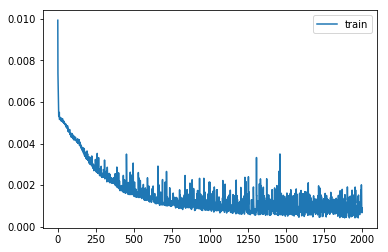

In [78]:
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy import concatenate
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [80]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [81]:
import math
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 88.18 RMSE
Test Score: 159.32 RMSE


In [82]:
inv_y=testY[0]
inv_yhat=testPredict[:,0]

error = []
for i in range(len(inv_y)):
    error.append(inv_y[i] - inv_yhat[i])
 
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值

print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE
def mape(inv_y, inv_yhat):
    n = len(inv_y)
    mape = sum(np.abs((inv_y - inv_yhat)/inv_y))/n*100
    return mape
print("MAPE = " ,mape(inv_y, inv_yhat))#平均绝对误差MAPE

MSE =  25384.275295163225
RMSE =  159.32443408078757
MAE =  94.11782387592565
MAPE =  4.857177483700085


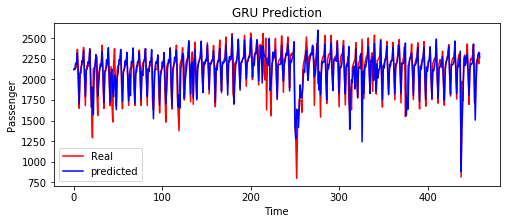

In [90]:
plt.figure(figsize=(8,3))
plt.plot(testY[0], color = 'red', label = 'Real ')   
plt.plot(testPredict[:,0], color = 'blue', label = 'predicted') 
plt.title('GRU Prediction')
plt.xlabel('Time')
plt.ylabel('Passenger')
plt.legend()
plt.show()

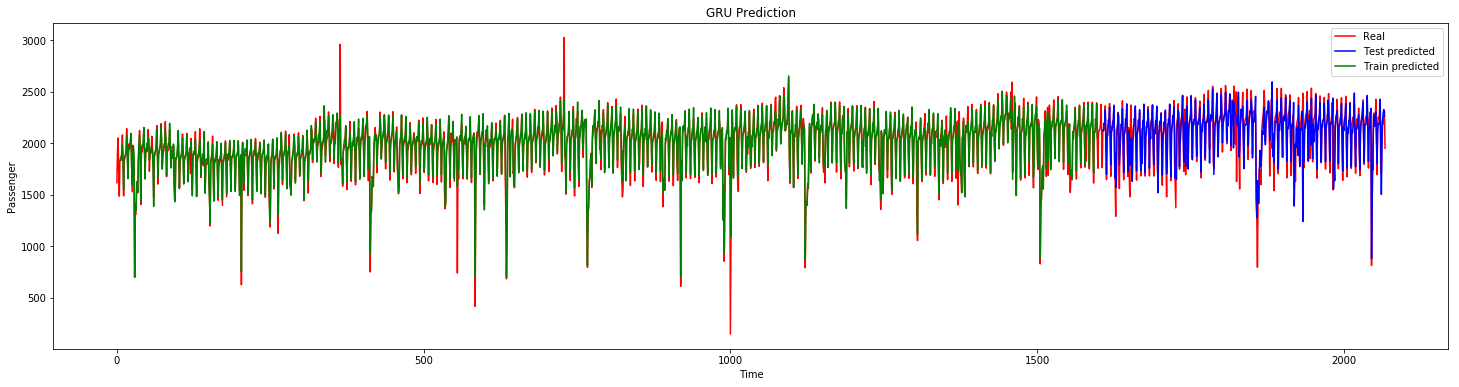

In [87]:
predicted=np.concatenate((trainPredict[:,0],testPredict[:,0]))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.figure(figsize=(25,6))
plt.plot(scaler.inverse_transform(dataset), color = 'red', label = 'Real ') 
plt.plot(testPredictPlot, color = 'blue', label = 'Test predicted')  
plt.plot(trainPredictPlot, color = 'green', label = 'Train predicted') 
plt.title('GRU Prediction')
plt.xlabel('Time')
plt.ylabel('Passenger')
plt.legend()
plt.show()

In [85]:
from keras.models import load_model
 
model.save('GRU2_model.h5')